In [86]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# data    =  pd.read_csv('data.txt',sep=',',engine='python',encoding='cp949',names=['x','y','label'])
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

## 1. plot the training data

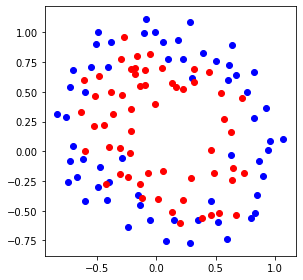

In [87]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## 2. write down the high dimensional function

$g(x,y,\theta)=\theta_0 + \theta_1x^2 + \theta_2y^2 + \theta_3xy$

In [88]:



train_matrix = np.c_[np.ones(pointX.shape[0]),pointX,pointY]
train_matrix

array([[ 1.       ,  0.051267 ,  0.69956  ],
       [ 1.       , -0.092742 ,  0.68494  ],
       [ 1.       , -0.21371  ,  0.69225  ],
       [ 1.       , -0.375    ,  0.50219  ],
       [ 1.       , -0.51325  ,  0.46564  ],
       [ 1.       , -0.52477  ,  0.2098   ],
       [ 1.       , -0.39804  ,  0.034357 ],
       [ 1.       , -0.30588  , -0.19225  ],
       [ 1.       ,  0.016705 , -0.40424  ],
       [ 1.       ,  0.13191  , -0.51389  ],
       [ 1.       ,  0.38537  , -0.56506  ],
       [ 1.       ,  0.52938  , -0.5212   ],
       [ 1.       ,  0.63882  , -0.24342  ],
       [ 1.       ,  0.73675  , -0.18494  ],
       [ 1.       ,  0.54666  ,  0.48757  ],
       [ 1.       ,  0.322    ,  0.5826   ],
       [ 1.       ,  0.16647  ,  0.53874  ],
       [ 1.       , -0.046659 ,  0.81652  ],
       [ 1.       , -0.17339  ,  0.69956  ],
       [ 1.       , -0.47869  ,  0.63377  ],
       [ 1.       , -0.60541  ,  0.59722  ],
       [ 1.       , -0.62846  ,  0.33406  ],
       [ 1

In [177]:
degree = 3
alpha = 1
iteration = 5000
m = label.size
#theta 랜덤 생성
np.random.seed(777)
theta = [-1,1,1,0]
theta

[-1, 1, 1, 0]

In [178]:
def high_demension(x,y,degree):
    res = np.c_[np.ones(x.shape[0]),x**2,y**2,x*y]
    return res

highf = high_demension(pointX,pointY,degree)
highf[0]

array([1.        , 0.00262831, 0.48938419, 0.03586434])

In [179]:
def cost(label,gx):
    j = np.mean(((-label*np.log(gx))-((1-label)*np.log(1-gx))))
    return j
def sigmoid(z):
    return 1 / (1+np.exp(-z))


In [183]:
def gradient_descent(matrix,label,theta,iterations,alpha):
    cost_history=[]
    theta_history=[theta]
    accuracy_history=[]
    for i in range(iterations):
        prediction = np.dot(matrix,theta)
        sig = sigmoid(prediction)
        error = sig - label
        accuracy_history.append(sig)
        cost_history.append(cost(label,sig))
        theta = theta - (alpha*(1/m)*np.dot(matrix.T,error))
        theta_history.append(theta)
    return theta_history, cost_history , accuracy_history

In [184]:
theta_history , cost_history, accuracy_history = gradient_descent(highf,label,theta,iteration,alpha)

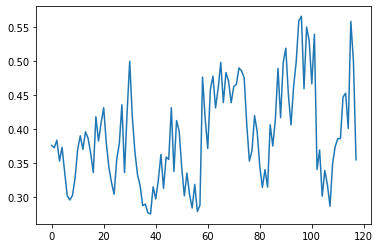

$g(x,y,\theta)=\theta_0 + \theta_1x^2 + \theta_2y^2 + \theta_3xy$